In [35]:
!pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
sns.set(style="whitegrid")

In [4]:
df = pd.read_parquet("yellow_tripdata_2025-01.parquet")

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [6]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          540149
trip_distance                 0
RatecodeID               540149
store_and_fwd_flag       540149
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     540149
Airport_fee              540149
cbd_congestion_fee            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [11]:
df.shape

(3475226, 20)

In [12]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False).round(2)
print(missing_percent)

passenger_count         15.54
RatecodeID              15.54
store_and_fwd_flag      15.54
congestion_surcharge    15.54
Airport_fee             15.54
dtype: float64


In [14]:
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0.0)
df['Airport_fee'] = df['Airport_fee'].fillna(0.0)

In [17]:
df.duplicated().sum()

0

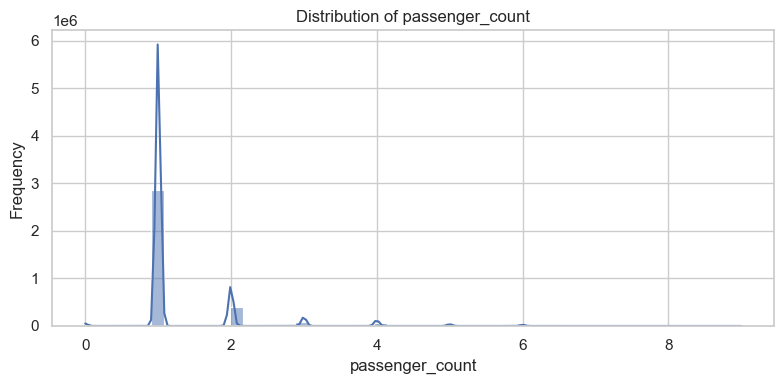

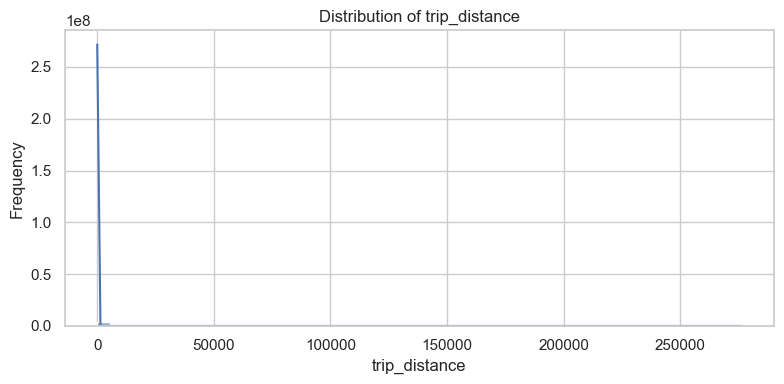

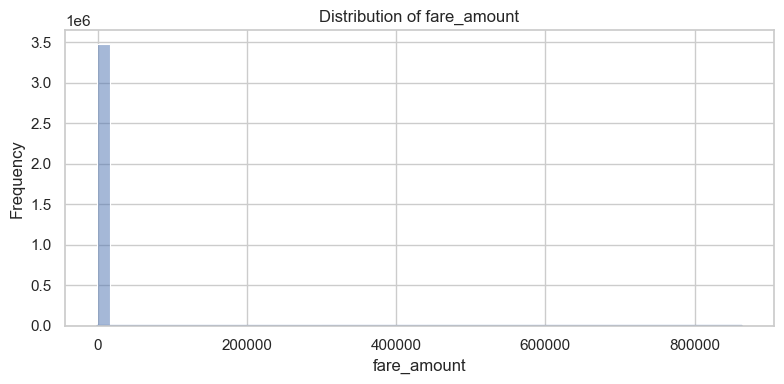

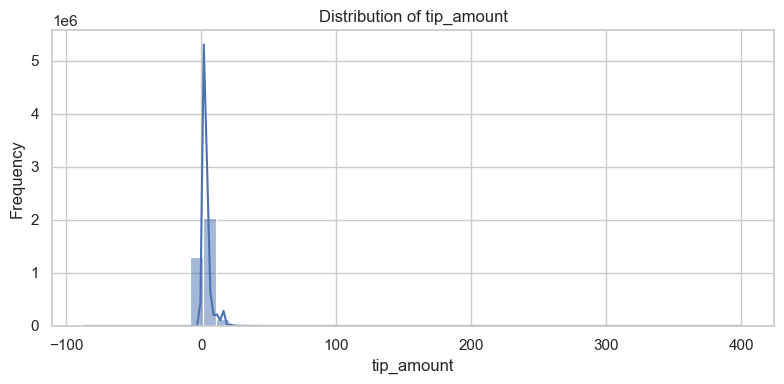

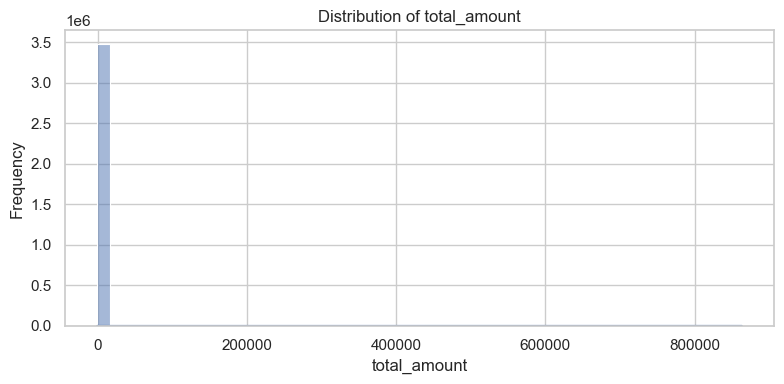

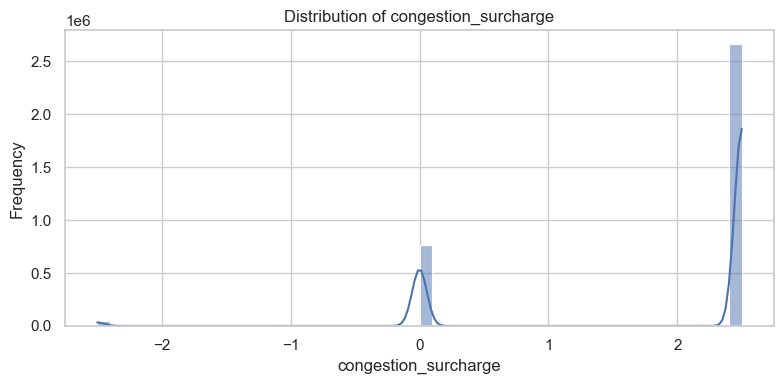

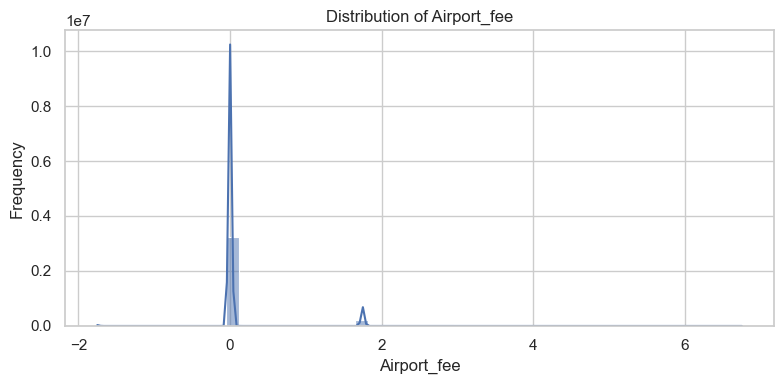

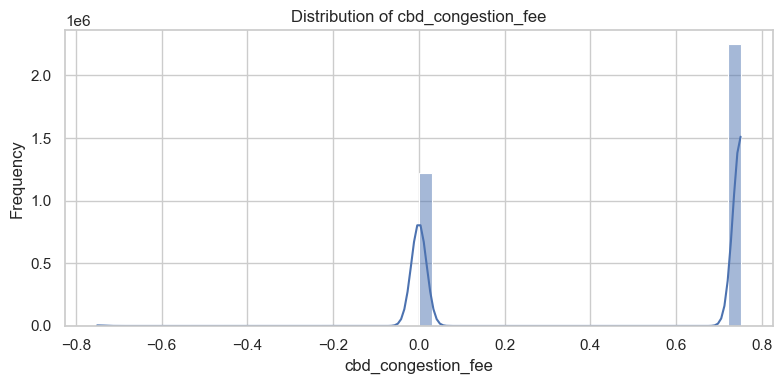

In [19]:
num_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 
            'total_amount', 'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

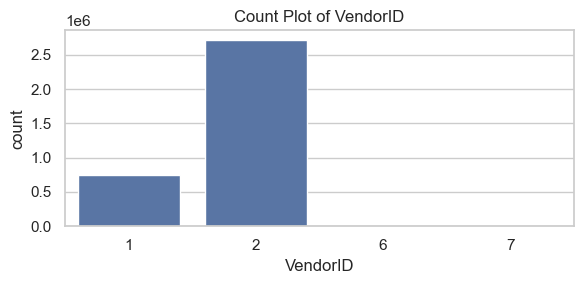

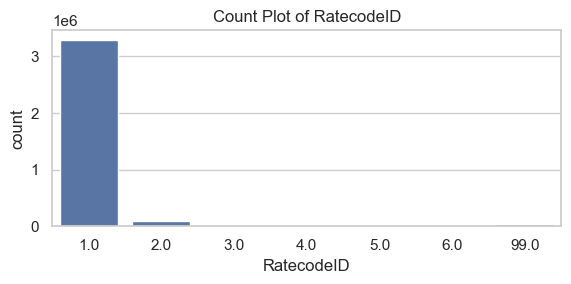

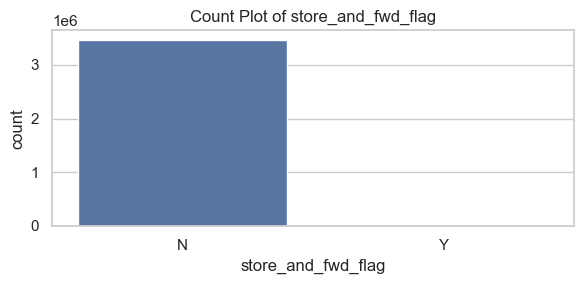

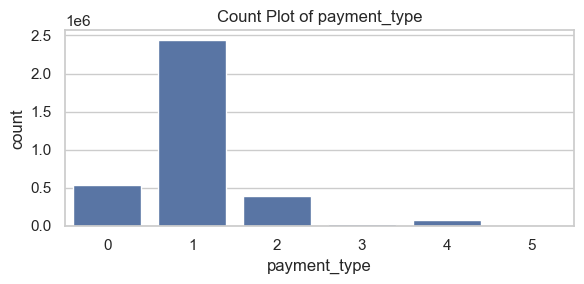

In [20]:
cat_cols = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

In [21]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

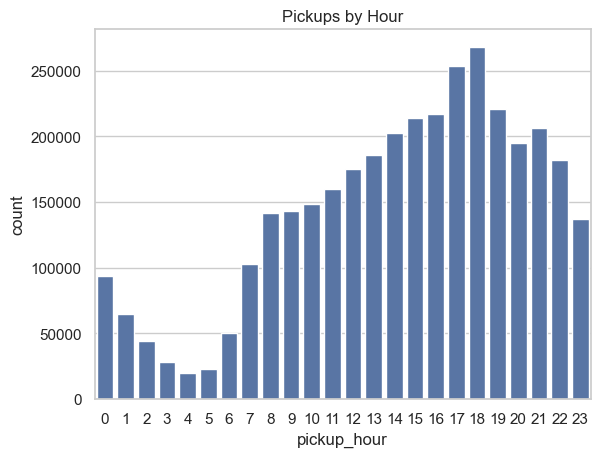

In [22]:
sns.countplot(x='pickup_hour', data=df)
plt.title('Pickups by Hour')
plt.show()

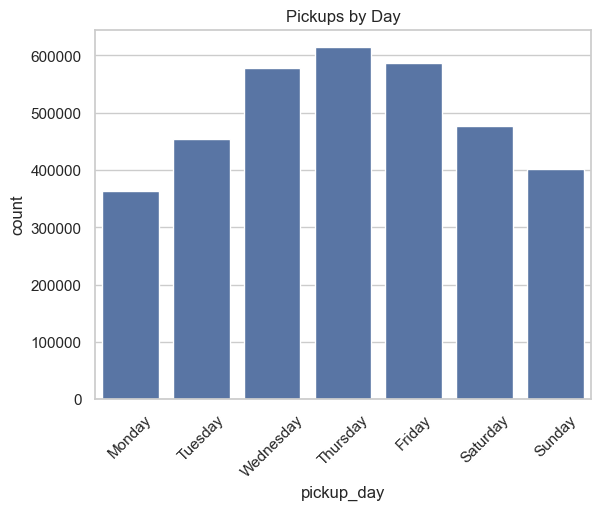

In [23]:
sns.countplot(x='pickup_day', data=df, order=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])
plt.title('Pickups by Day')
plt.xticks(rotation=45)
plt.show()

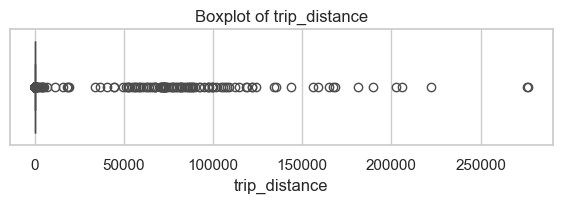

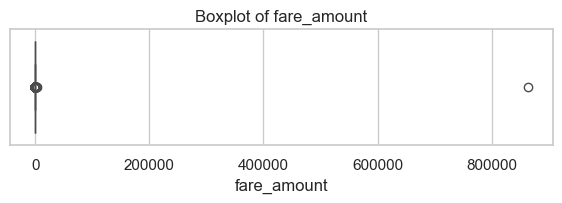

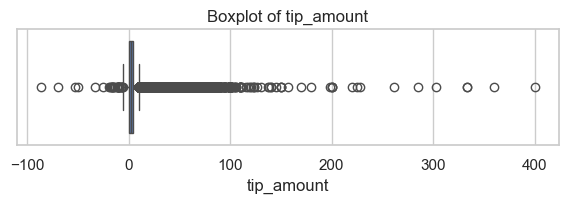

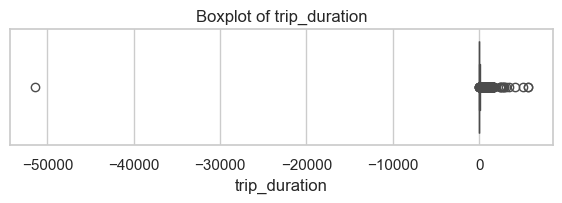

In [24]:
cols_to_check = ['trip_distance', 'fare_amount', 'tip_amount', 'trip_duration']

for col in cols_to_check:
    plt.figure(figsize=(7, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [25]:
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100)]

In [26]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 500)]

In [28]:
df = df[(df['tip_amount'] >= 0) & (df['tip_amount'] < 100)]

In [30]:
df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 180)]

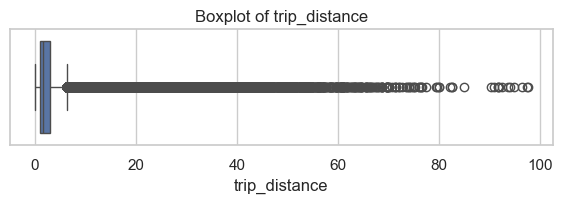

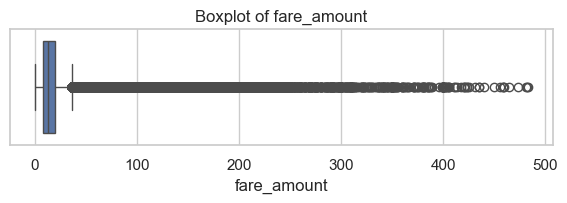

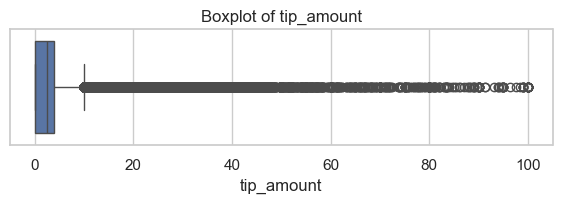

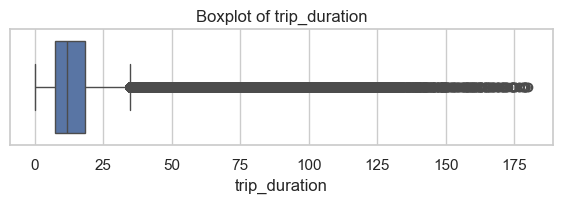

In [31]:
cols_to_check = ['trip_distance', 'fare_amount', 'tip_amount', 'trip_duration']

for col in cols_to_check:
    plt.figure(figsize=(7, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

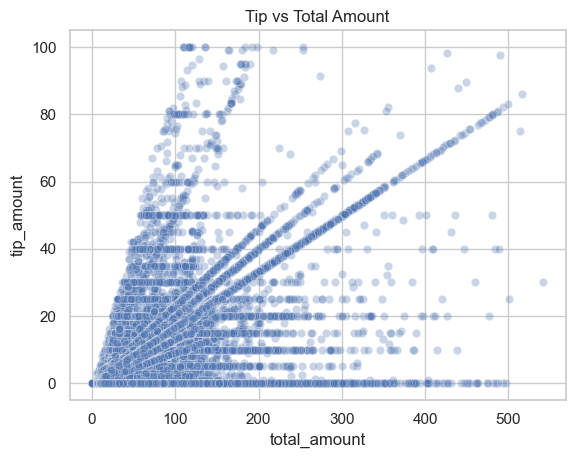

In [32]:
sns.scatterplot(x='total_amount', y='tip_amount', data=df, alpha=0.3)
plt.title('Tip vs Total Amount')
plt.show()

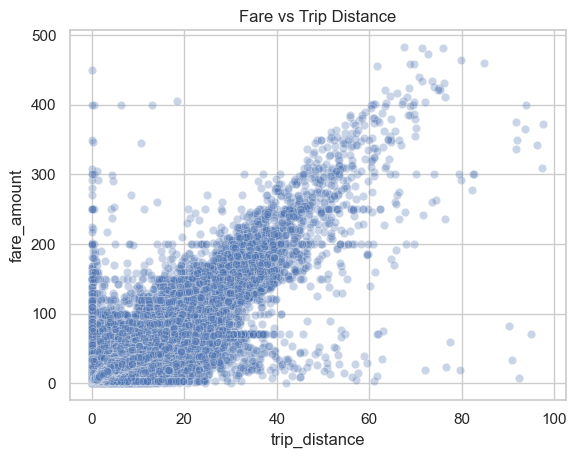

In [33]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.3)
plt.title('Fare vs Trip Distance')
plt.show()

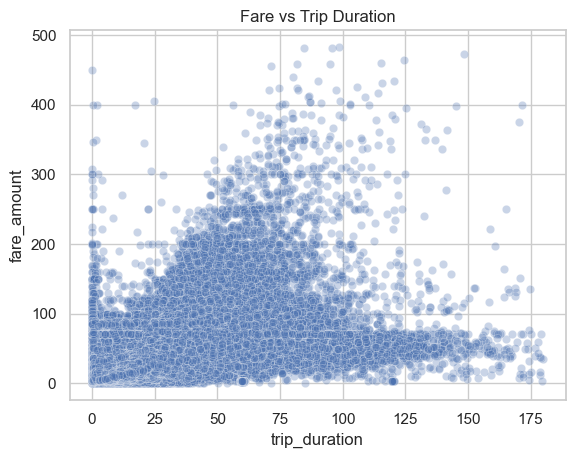

In [34]:
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.3)
plt.title('Fare vs Trip Duration')
plt.show()